In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
boston = datasets.load_boston()

In [4]:
# -1 => 倒数第一个 
x = boston.data[:, -1].reshape(-1, 1)
y = boston.target.reshape(-1, 1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

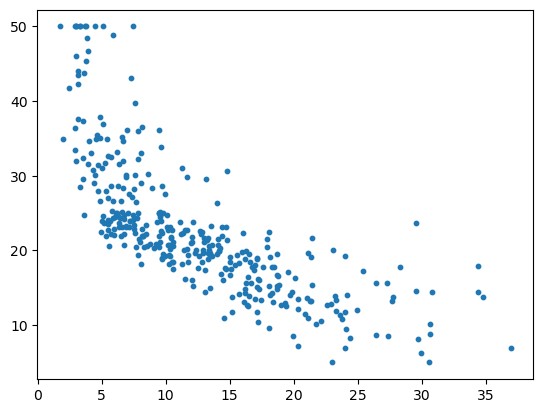

In [6]:
plt.scatter(x_train, y_train, s = 10)
plt.show()

### sklearn实现一元线性回归

In [7]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
model = linearReg.fit(x_train, y_train)

In [8]:
y_predict = model.predict(x_test)

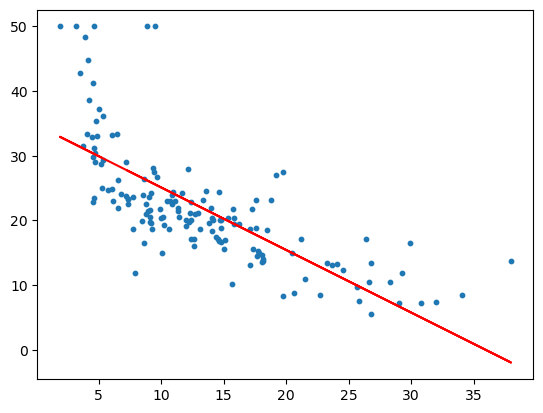

In [9]:
plt.scatter(x_test, y_test, s = 10)
plt.plot(x_test, y_predict, c = 'r')
plt.show()

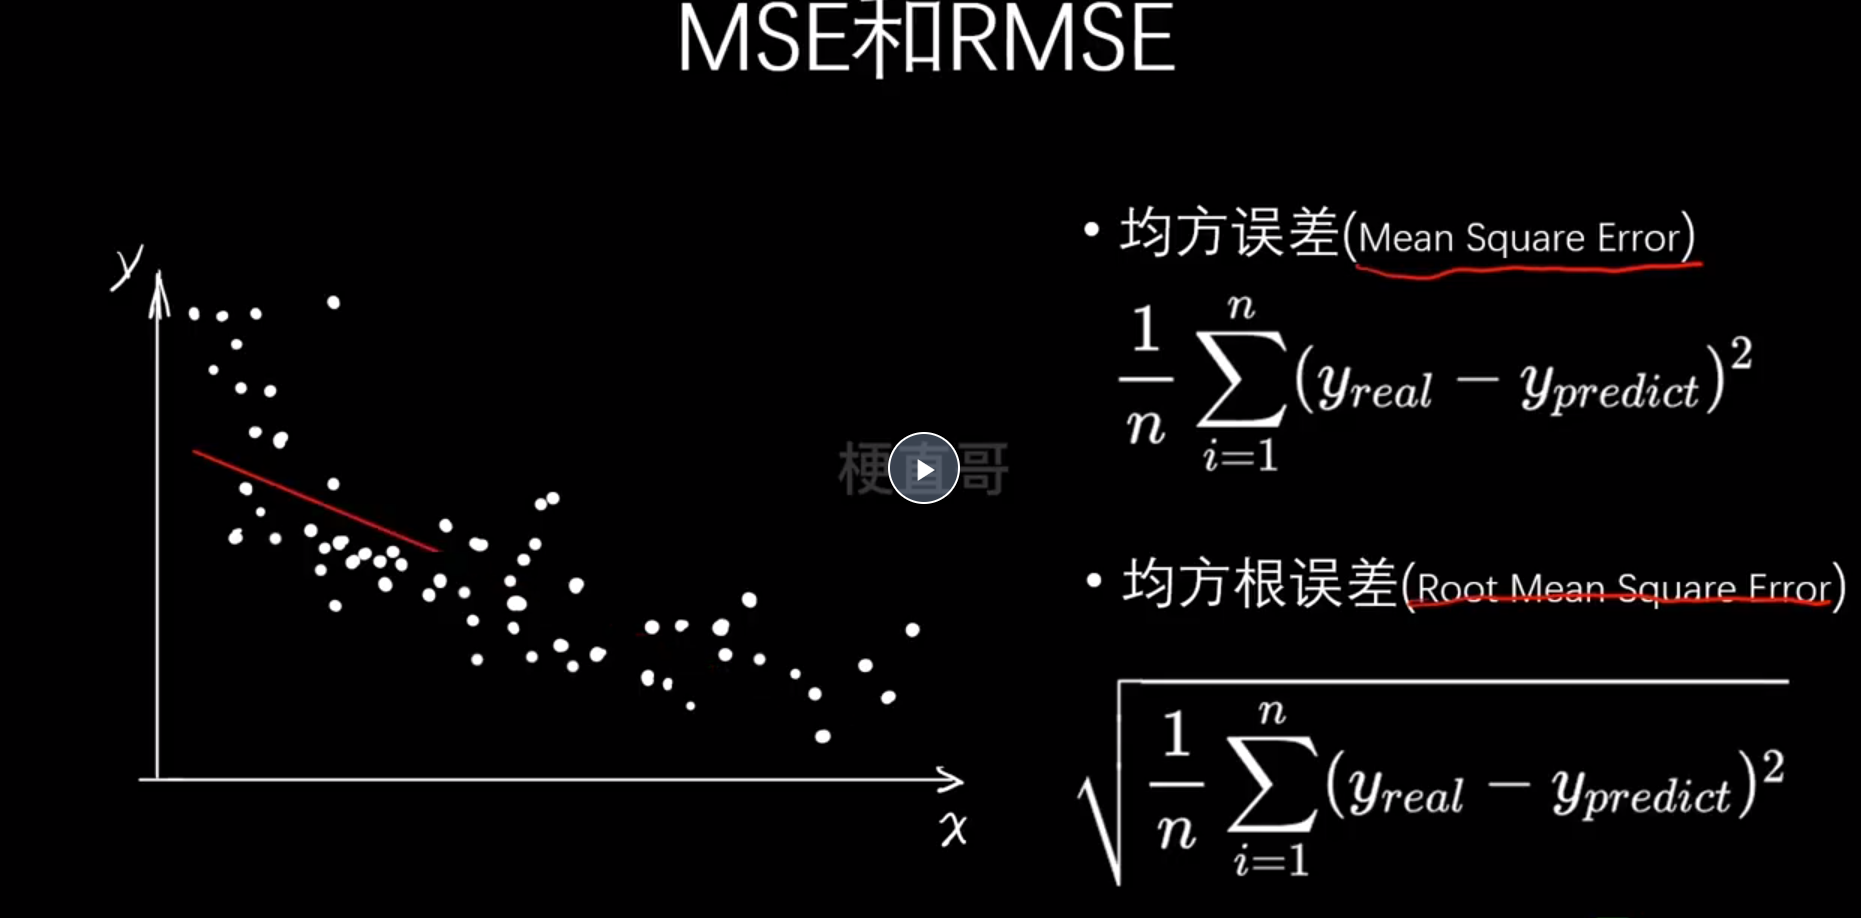

### MSE  (Mean Square Error )均方误差

In [10]:
y_real = y_test

In [11]:
# 真实的测试数据集 y是我们
#mse =误差 均方误差
mse  = np.sum((y_real-y_predict) ** 2) / len(y_test)
mse

39.81715050474416

### Sklearn 中的 MSE  (Mean Square Error )均方误差

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real,y_predict)

39.81715050474416

## RMSE 均方根误差

In [16]:
#rmse  = 根号 mse
rmse = np.sqrt(mse)

In [17]:
rmse

6.310083240714354

### Sklearn 中的RMSE  ( Root Mean Square Error )均方误差

In [20]:
mean_squared_error(y_real,y_predict,squared=False)

6.310083240714354

## MAE(Mean Absolute Error)  平均绝对误差  =>均方误差 加绝对值

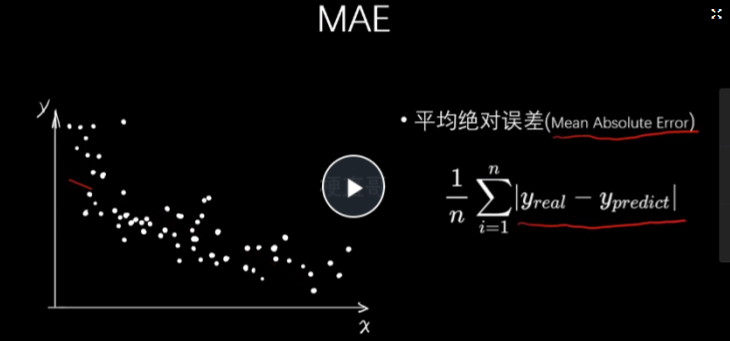

In [21]:
mae = np.sum(np.abs(y_real - y_predict)) / len(y_test)

In [22]:
mae

4.4883446998468415

### Sklearn 中的MAE

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_real, y_predict)

4.4883446998468415

### $R^2$  用于误差，归一化，让取值不再无上限(推荐)

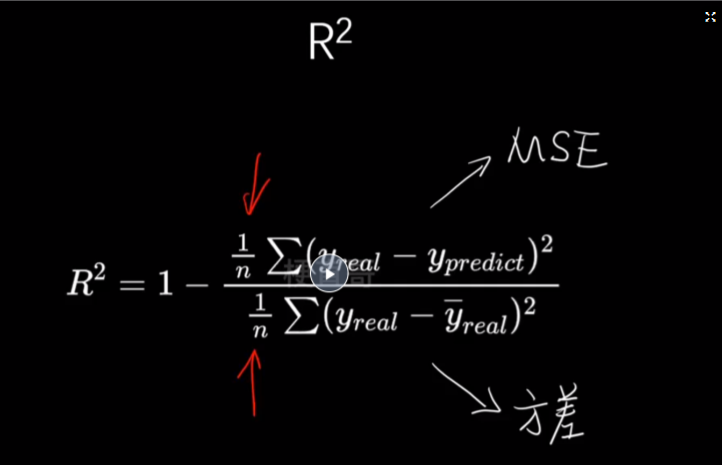

In [28]:
r2 = 1 - (np.sum((y_real - y_predict) ** 2)) / (np.sum((y_real - np.mean(y_real)) ** 2))
r2


0.5218049526125568

In [30]:
#mse 上面我们算了 
#np.var =  方差
r2_simple = 1 - mse /np.var(y_real)
r2_simple

0.5218049526125568

###  Sklearn  的 $R^2$

In [32]:
from sklearn.metrics import r2_score
r2_score(y_real,y_predict)

0.5218049526125568

In [33]:
#模型自带的误差评分就是 R^2
model.score(x_test,y_test)

0.5218049526125568